##Model Building using Sequential APIs on MINST dataset


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

layers = tf.keras.layers

In [30]:
dataset = tf.keras.datasets.fashion_mnist

In [31]:
(x_train,y_train), (x_test,y_test) = dataset.load_data()
y_train = y_train - 1
y_test = y_test - 1

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

In [37]:
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print("actual class: ",class_names[y_test[0]-1])
print("Predicted_class: ",class_names[predicted_label])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
actual class:  ankle boot
Predicted_class:  Pullover


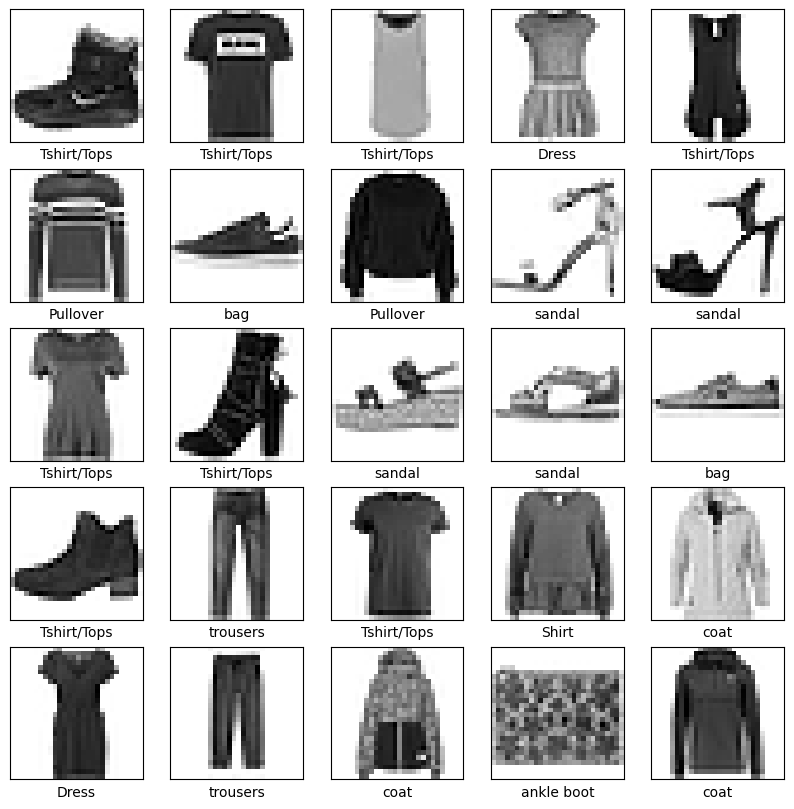

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

layers = tf.keras.layers

dataset = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = dataset.load_data()
# Correct the labels to be in the range 0-8
y_train = y_train % 9
y_test = y_test % 9

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ["Tshirt/Tops", "trousers", "Pullover", "Dress", "coat", "sandal", 'Shirt', "bag", "ankle boot"]

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])  # Now y_train[i] will be within the valid range

plt.show()

In [39]:
model = tf.keras.Sequential()

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7600 - loss: 0.6785
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8605 - loss: 0.3890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3473
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8805 - loss: 0.3230
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8859 - loss: 0.3074


In [42]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.3441


[0.3452571630477905, 0.8761000037193298]

In [43]:
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print("actual class: ",class_names[y_test[0]])
print("Predicted_class: ",class_names[predicted_label])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual class:  Tshirt/Tops
Predicted_class:  Tshirt/Tops


In [44]:
for i in range(10):

  predicted_label = np.argmax(predictions[i])
  print("actual class: ",class_names[y_test[i]])
  print("Predicted_class: ",class_names[predicted_label])

actual class:  Tshirt/Tops
Predicted_class:  Tshirt/Tops
actual class:  Pullover
Predicted_class:  Pullover
actual class:  trousers
Predicted_class:  trousers
actual class:  trousers
Predicted_class:  trousers
actual class:  Shirt
Predicted_class:  Shirt
actual class:  trousers
Predicted_class:  trousers
actual class:  coat
Predicted_class:  coat
actual class:  Shirt
Predicted_class:  Shirt
actual class:  sandal
Predicted_class:  sandal
actual class:  bag
Predicted_class:  bag


##Model Building using Functional APIs

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout,Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from PIL import Image,ImageFont,ImageDraw
import itertools
import random

In [9]:
dataset = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = dataset.load_data()

x_train , x_test = x_train/255.0 , x_test/255.0

Train: x=(60000, 28, 28) , y=(60000,)
Test: x=(10000, 28, 28) , y=(10000,)


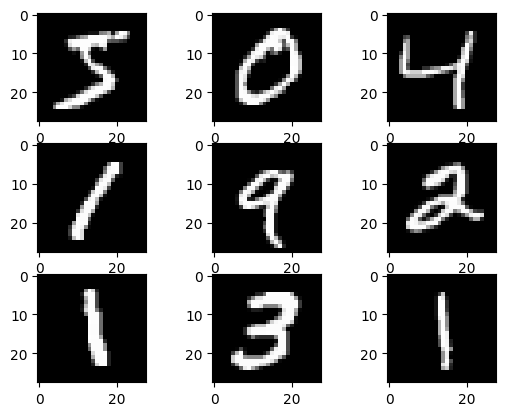

In [12]:
print("Train: x=%s , y=%s"% (x_train.shape,y_train.shape))
print("Test: x=%s , y=%s"% (x_test.shape,y_test.shape))

for i in range(9):
  plt.subplot(330 + 1+i)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [18]:

def functional_api():

  input_layer = tf.keras.Input(shape = (28,28))
  flatten_layers = tf.keras.layers.Flatten()(input_layer)
  first_dense = tf.keras.layers.Dense(128,activation = tf.nn.relu)(flatten_layers)
  output_layer = tf.keras.layers.Dense(10,activation = tf.nn.softmax)(first_dense)


  func_model = Model(inputs = input_layer,outputs = output_layer)
  return func_model

In [20]:
model = functional_api()

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [23]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8792 - loss: 0.4286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9647 - loss: 0.1194
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9750 - loss: 0.0775
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0435


In [24]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0938


[0.07885006070137024, 0.9781000018119812]

In [27]:
prediction = model.predict(x_test)
predicted_label = np.argmax(prediction[0])
print("actual class: ",y_test[0])
print("Predicted_class: ",predicted_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
actual class:  7
Predicted_class:  7


In [28]:
for i in range(10):

  predicted_label = np.argmax(predictions[i])
  print("actual class: ",[y_test[i]])
  print("Predicted_class: ",[predicted_label])

actual class:  [7]
Predicted_class:  [7]
actual class:  [2]
Predicted_class:  [2]
actual class:  [1]
Predicted_class:  [1]
actual class:  [0]
Predicted_class:  [0]
actual class:  [4]
Predicted_class:  [4]
actual class:  [1]
Predicted_class:  [1]
actual class:  [4]
Predicted_class:  [4]
actual class:  [9]
Predicted_class:  [9]
actual class:  [5]
Predicted_class:  [5]
actual class:  [9]
Predicted_class:  [9]
